In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
path_p=r"/content/mail_data.csv"
df=pd.read_csv(path_p)

In [ ]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data=df.where((pd.notnull(df)),'')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
df['Category']=enc.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5157, 2)

In [ ]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

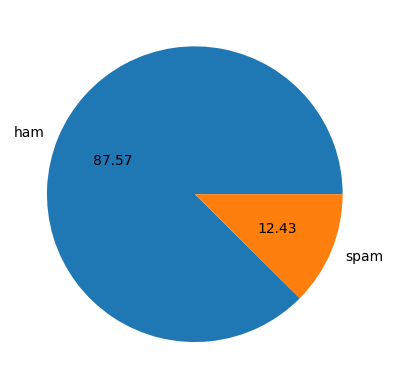

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
x = df['Message'].values.reshape(-1, 1)
y = df['Category']
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

# fit predictor and target
x,y = ros.fit_resample(x, y)

print('Modified dataset shape', Counter(y))

Original dataset shape Counter({0: 4516, 1: 641})
Modified dataset shape Counter({0: 4516, 1: 4516})


In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import re

def extract_hyperlinks(text):

    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


    hyperlinks = re.findall(pattern, text)


    for link in hyperlinks:
        text = text.replace(link, f"'{link}'")

    return text

In [ ]:
import nltk
nltk.download('stopwords')
print(transform_text("I loved the lectures on Machine Learning. How about you?"))

love lectur machin learn


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(transform_text('I loved the lectures on Machine Learning. How about you?'))

love lectur machin learn


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string

In [ ]:
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df['transMessage'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,transMessage
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transMessage']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape
Y = df['Category'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the classifier
knnc = KNeighborsClassifier(n_neighbors=1)

# Measure the training time
start_time = time.time()
knnc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
predictions = knnc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print('Accuracy of KNN:', accuracy)
print('Precision of KNN:', precision)
print('Recall of KNN:', recall)
print('F1 Score of KNN:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of KNN: 0.9434108527131783
Precision of KNN: 0.9468504928063822
Recall of KNN: 0.9434108527131783
F1 Score of KNN: 0.936068616583821
Confusion Matrix:
[[1128    0]
 [  73   89]]
Training Time: 0.0018372535705566406 seconds
Testing Time: 3.6316325664520264 seconds


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create an SVM classifier with a specified random state for reproducibility
svm_classifier = SVC(random_state=1)

# Measure the training time
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
predictions = svm_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print('Accuracy of SVM:', accuracy)
print('Precision of SVM:', precision)
print('Recall of SVM:', recall)
print('F1 Score of SVM:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of SVM: 0.9689922480620154
Precision of SVM: 0.9697399692976418
Recall of SVM: 0.9689922480620154
F1 Score of SVM: 0.9671891134756851
Confusion Matrix:
[[1127    1]
 [  39  123]]
Training Time: 28.585968017578125 seconds
Testing Time: 15.465097904205322 seconds


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# # Create an SVM classifier with a specified random state for reproducibility
# svm_classifier = SVC(random_state=1)

# # Fit the model to the training data
# svm_classifier.fit(X_train, y_train)

# # Predict the labels for the test data
# predictions = svm_classifier.predict(X_test)

# # Print the accuracy of the SVM
# print('Accuracy of SVM:')
# print(accuracy_score(predictions, y_test))

# # Print the confusion matrix
# print(confusion_matrix(predictions, y_test))

# # Print the precision score
# print(precision_score(predictions, y_test, average='weighted'))  # Use average='weighted' for multi-class classification


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create a Decision Tree classifier with a specified random state and max depth
clf = DecisionTreeClassifier(random_state=1, max_depth=40)

# Measure the training time
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pred = clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)

print('Accuracy of Decision Tree:', accuracy)
print('Precision of Decision Tree:', precision)
print('Recall of Decision Tree:', recall)
print('F1 Score of Decision Tree:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Decision Tree: 0.962015503875969
Precision of Decision Tree: 0.9611938890247858
Recall of Decision Tree: 0.962015503875969
F1 Score of Decision Tree: 0.9602635226947482
Confusion Matrix:
[[1119    9]
 [  40  122]]
Training Time: 10.10494613647461 seconds
Testing Time: 0.021634340286254883 seconds


In [ ]:
# clf.fit(X_train, y_train)
# pred=clf.predict(X_test)

In [ ]:
# print('Accuracy of Decision Tree:-')
# print(accuracy_score(pred,y_test))
# print(confusion_matrix(pred,y_test))
# print(precision_score(pred,y_test))

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the base classifiers
base_classifiers = [
    ('svm', SVC(kernel='linear', random_state=40, probability=True)),  # SVM with linear kernel
    ('knn', KNeighborsClassifier(n_neighbors=1))
]

# Define the meta-classifier
meta_classifier = KNeighborsClassifier(n_neighbors=1)

# Define the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Measure the training time
start_time = time.time()
stacking_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pred = stacking_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)

print('Stacking Classifier Accuracy:', accuracy)
print('Stacking Classifier Precision:', precision)
print('Stacking Classifier Recall:', recall)
print('Stacking Classifier F1 Score:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Stacking Classifier Accuracy: 0.9674418604651163
Stacking Classifier Precision: 0.9670036251431601
Stacking Classifier Recall: 0.9674418604651163
Stacking Classifier F1 Score: 0.9671778887617656
Confusion Matrix:
[[1110   18]
 [  24  138]]
Training Time: 299.6481854915619 seconds
Testing Time: 6.334444999694824 seconds


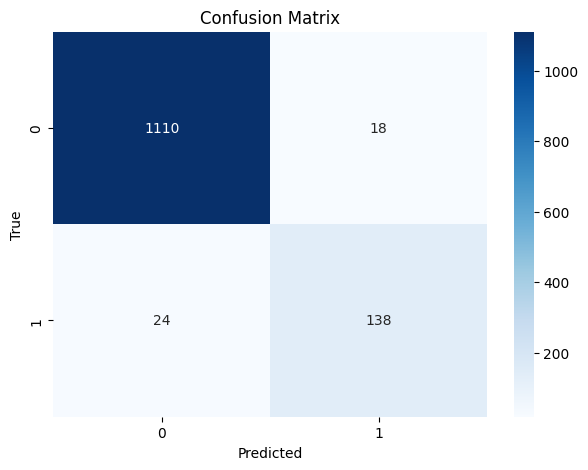

In [ ]:
# Plot the colorful confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=stacking_classifier.classes_, yticklabels=stacking_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import accuracy_score

# # Define the base classifiers
# base_classifiers = [
#     ('svm', SVC(kernel='linear', random_state=40, probability=True)),  # SVM with linear kernel
#     ('knn', KNeighborsClassifier(n_neighbors=1))
# ]

# # Define the meta-classifier
# meta_classifier = KNeighborsClassifier(n_neighbors=1)

# # Define the stacking classifier
# stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# # Train the stacking classifier
# stacking_classifier.fit(X_train, y_train)

# # Evaluate the stacking classifier
# accuracy = stacking_classifier.score(X_test, y_test)
# print("Stacking Classifier Accuracy:", accuracy)


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np


# # Step 2: Build base classifiers
# dt_classifier = DecisionTreeClassifier(random_state=42)
# dt_classifier.fit(X_train, y_train)

# knn_classifier = KNeighborsClassifier(n_neighbors=50)
# knn_classifier.fit(X_train, y_train)

# # Step 3: Create a meta-classifier (MLP ANN)
# # Concatenate predictions of base classifiers with original features
# dt_pred_train = dt_classifier.predict(X_train).reshape(-1, 1)
# knn_pred_train = knn_classifier.predict(X_train).reshape(-1, 1)
# X_train_meta = np.concatenate((X_train, dt_pred_train, knn_pred_train), axis=1)

# # Train MLP on concatenated feature set
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
# mlp_classifier.fit(X_train_meta, y_train)

# # Step 4: Stacking
# # Concatenate predictions of base classifiers with original features for testing data
# dt_pred_test = dt_classifier.predict(X_test).reshape(-1, 1)
# knn_pred_test = knn_classifier.predict(X_test).reshape(-1, 1)
# X_test_meta = np.concatenate((X_test, dt_pred_test, knn_pred_test), axis=1)
# # Use trained MLP to make predictions on concatenated feature set of testing data
# y_pred_test = mlp_classifier.predict(X_test_meta)

# # Step 5: Evaluate performance
# accuracy = accuracy_score(y_test, y_pred_test)
# print("Accuracy:", accuracy)


In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 2: Build base classifiers
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # Using a linear kernel for simplicity
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_time_svm = time.time() - start_time

knn_classifier = KNeighborsClassifier(n_neighbors=50)
start_time = time.time()
knn_classifier.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Step 3: Create a meta-classifier (MLP ANN)
# Concatenate predictions of base classifiers with original features
svm_pred_train = svm_classifier.predict(X_train).reshape(-1, 1)
knn_pred_train = knn_classifier.predict(X_train).reshape(-1, 1)
X_train_meta = np.concatenate((X_train, svm_pred_train, knn_pred_train), axis=1)

# Train MLP on concatenated feature set
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
start_time = time.time()
mlp_classifier.fit(X_train_meta, y_train)
training_time_mlp = time.time() - start_time

# Step 4: Stacking
# Concatenate predictions of base classifiers with original features for testing data
svm_pred_test = svm_classifier.predict(X_test).reshape(-1, 1)
knn_pred_test = knn_classifier.predict(X_test).reshape(-1, 1)
X_test_meta = np.concatenate((X_test, svm_pred_test, knn_pred_test), axis=1)

# Use trained MLP to make predictions on concatenated feature set of testing data
start_time = time.time()
y_pred_test = mlp_classifier.predict(X_test_meta)
testing_time = time.time() - start_time

# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training Time (SVM):", training_time_svm, "seconds")
print("Training Time (KNN):", training_time_knn, "seconds")
print("Training Time (MLP):", training_time_mlp, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy: 0.982170542635659
Precision: 0.9825268219748248
Recall: 0.982170542635659
F1 Score: 0.981579319483541
Training Time (SVM): 62.6307852268219 seconds
Training Time (KNN): 0.001337289810180664 seconds
Training Time (MLP): 32.46801161766052 seconds
Testing Time: 0.06703305244445801 seconds


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Step 2: Build base classifiers
# svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # Using a linear kernel for simplicity
# svm_classifier.fit(X_train, y_train)

# knn_classifier = KNeighborsClassifier(n_neighbors=50)
# knn_classifier.fit(X_train, y_train)

# # Step 3: Create a meta-classifier (MLP ANN)
# # Concatenate predictions of base classifiers with original features
# svm_pred_train = svm_classifier.predict(X_train).reshape(-1, 1)
# knn_pred_train = knn_classifier.predict(X_train).reshape(-1, 1)
# X_train_meta = np.concatenate((X_train, svm_pred_train, knn_pred_train), axis=1)

# # Train MLP on concatenated feature set
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
# mlp_classifier.fit(X_train_meta, y_train)

# # Step 4: Stacking
# # Concatenate predictions of base classifiers with original features for testing data
# svm_pred_test = svm_classifier.predict(X_test).reshape(-1, 1)
# knn_pred_test = knn_classifier.predict(X_test).reshape(-1, 1)
# X_test_meta = np.concatenate((X_test, svm_pred_test, knn_pred_test), axis=1)

# # Use trained MLP to make predictions on concatenated feature set of testing data
# y_pred_test = mlp_classifier.predict(X_test_meta)

# # Step 5: Evaluate performance
# accuracy = accuracy_score(y_test, y_pred_test)
# print("Accuracy:", accuracy)


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('svm', svm_classifier), ('knn', knn_classifier)], voting='hard')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted', zero_division=0)
recall = recall_score(y_test, pvc, average='weighted', zero_division=0)
f1 = f1_score(y_test, pvc, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, pvc)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy: 0.8744186046511628
Precision: 0.7646078961600866
Recall: 0.8744186046511628
F1 Score: 0.8158347279127475
Confusion Matrix:
[[1128    0]
 [ 162    0]]
Training Time: 65.34369611740112 seconds
Testing Time: 6.8065056800842285 seconds


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Fit models on training data
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predict classes for test data
knn_pred_proba = knn_model.predict_proba(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

# Get class labels with highest probability using argmax
knn_pred = np.argmax(knn_pred_proba, axis=1)
dt_pred = np.argmax(dt_pred_proba, axis=1)

# Print predicted class labels
print("KNN Predictions:", knn_pred)
print("DT Predictions:", dt_pred)

KNN Predictions: [0 0 0 ... 0 1 0]
DT Predictions: [0 0 0 ... 0 1 0]


NOW CHECKING FOR OTHER CLASSIFIERS ALSO

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Measure the training time
start_time = time.time()
logreg.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = logreg.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy of Logistic Regression:', accuracy)
print('Precision of Logistic Regression:', precision)
print('Recall of Logistic Regression:', recall)
print('F1 Score of Logistic Regression:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Logistic Regression: 0.9790697674418605
Precision of Logistic Regression: 0.9792004886382449
Recall of Logistic Regression: 0.9790697674418605
F1 Score of Logistic Regression: 0.9783757228719829
Training Time: 1.4137518405914307 seconds
Testing Time: 0.03348660469055176 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Logistic', logreg), ('knn', knnc)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of KNN + Logistic Regression:', accuracy)
print('Precision of KNN + Logistic Regression:', precision)
print('Recall of KNN + Logistic Regression:', recall)
print('F1 Score of KNN + Logistic Regression:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of KNN + Logistic Regression: 0.9434108527131783
Precision of KNN + Logistic Regression: 0.9468504928063822
Recall of KNN + Logistic Regression: 0.9434108527131783
F1 Score of KNN + Logistic Regression: 0.936068616583821
Training Time: 1.4681448936462402 seconds
Testing Time: 2.178766965866089 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Logistic', logreg), ('MLP', mlp_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Logistic + MLP:', accuracy)
print('Precision of Logistic + MLP:', precision)
print('Recall of Logistic + MLP:', recall)
print('F1 Score of Logistic + MLP:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Logistic + MLP: 0.9790697674418605
Precision of Logistic + MLP: 0.979365321702163
Recall of Logistic + MLP: 0.9790697674418605
F1 Score of Logistic + MLP: 0.9783094564950571
Training Time: 39.67823672294617 seconds
Testing Time: 0.10368919372558594 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Decision Tree', clf), ('MLP', mlp_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Decision Tree + MLP:', accuracy)
print('Precision of Decision Tree + MLP:', precision)
print('Recall of Decision Tree + MLP:', recall)
print('F1 Score of Decision Tree + MLP:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Decision Tree + MLP: 0.9643410852713178
Precision of Decision Tree + MLP: 0.9635779819819387
Recall of Decision Tree + MLP: 0.9643410852713178
F1 Score of Decision Tree + MLP: 0.9628730897638975
Training Time: 45.2797372341156 seconds
Testing Time: 0.0978708267211914 seconds


In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Measure the training time
start_time = time.time()
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = nb_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy of Naive Bayes:', accuracy)
print('Precision of Naive Bayes:', precision)
print('Recall of Naive Bayes:', recall)
print('F1 Score of Naive Bayes:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Naive Bayes: 0.8713178294573644
Precision of Naive Bayes: 0.9188837441396278
Recall of Naive Bayes: 0.8713178294573644
F1 Score of Naive Bayes: 0.8855272409651709
Training Time: 0.4799056053161621 seconds
Testing Time: 0.1449887752532959 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Decision Tree', clf), ('Naive_bayes', nb_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Naive Bayes + Decision Tree:', accuracy)
print('Precision of Naive Bayes + Decision Tree:', precision)
print('Recall of Naive Bayes + Decision Tree:', recall)
print('F1 Score of Naive Bayes + Decision Tree:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Naive Bayes + Decision Tree: 0.8689922480620155
Precision of Naive Bayes + Decision Tree: 0.9065894472033414
Recall of Naive Bayes + Decision Tree: 0.8689922480620155
F1 Score of Naive Bayes + Decision Tree: 0.8814890322826374
Training Time: 9.11655569076538 seconds
Testing Time: 0.16454219818115234 seconds


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Measure the training time
start_time = time.time()
xgb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = xgb_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy: 0.975968992248062
Precision: 0.9757600891251089
Recall: 0.975968992248062
F1 Score: 0.975247049477445
Training Time: 5.2445244789123535 seconds
Testing Time: 0.08147644996643066 seconds


In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, X_test, y_train, y_test are defined previously

# Base estimators
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('xgboost', XGBClassifier())
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

# Measure the training time
start_time = time.time()
stacking_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = stacking_clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy of Stacking Classifier:", accuracy)
print("Precision of Stacking Classifier:", precision)
print("Recall of Stacking Classifier:", recall)
print("F1 Score of Stacking Classifier:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy of Stacking Classifier: 0.9596899224806201
Precision of Stacking Classifier: 0.9609414652410867
Recall of Stacking Classifier: 0.9596899224806201
F1 Score of Stacking Classifier: 0.9602036292715156
Training Time: 38.483439445495605 seconds
Testing Time: 0.0598294734954834 seconds


In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base estimators
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgboost', XGBClassifier())
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

# Measure the training time
start_time = time.time()
stacking_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = stacking_clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy of Stacking Classifier:", accuracy)
print("Precision of Stacking Classifier:", precision)
print("Recall of Stacking Classifier:", recall)
print("F1 Score of Stacking Classifier:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy of Stacking Classifier: 0.9589147286821705
Precision of Stacking Classifier: 0.9588080808416817
Recall of Stacking Classifier: 0.9589147286821705
F1 Score of Stacking Classifier: 0.958860230934723
Training Time: 45.52285838127136 seconds
Testing Time: 3.7289068698883057 seconds


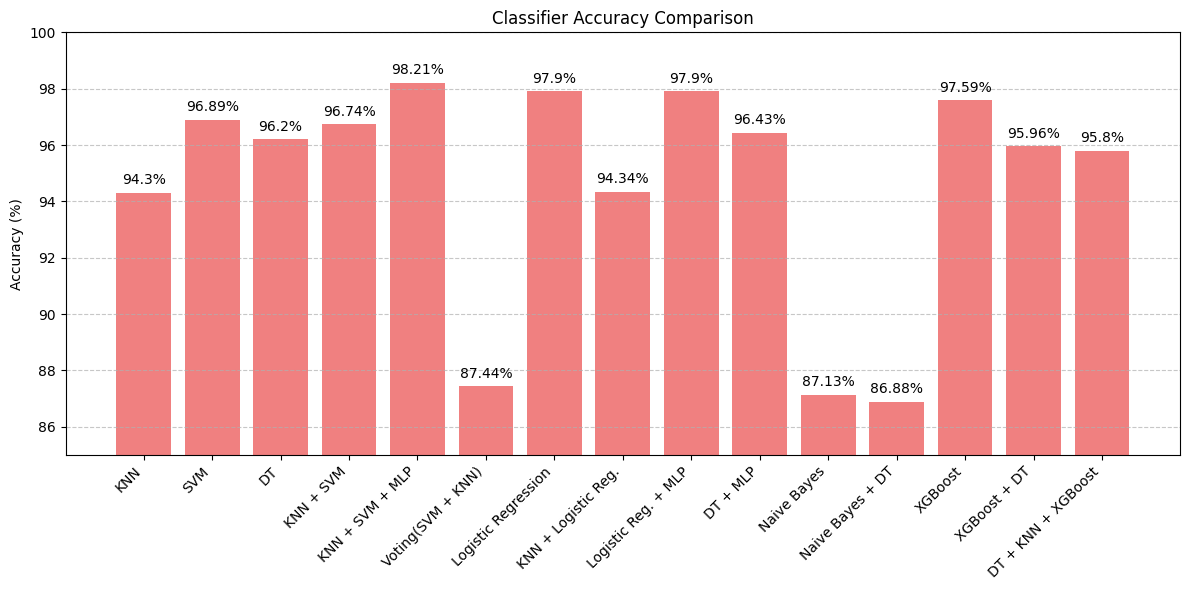

In [ ]:
import matplotlib.pyplot as plt

# Data
classifiers = [
    'KNN', 'SVM', 'DT', 'KNN + SVM', 'KNN + SVM + MLP', 'Voting(SVM + KNN)',
    'Logistic Regression', 'KNN + Logistic Reg.', 'Logistic Reg. + MLP',
    'DT + MLP', 'Naive Bayes', 'Naive Bayes + DT', 'XGBoost', 'XGBoost + DT',
    'DT + KNN + XGBoost'
]

accuracies = [
    94.3, 96.89, 96.2, 96.74, 98.21, 87.44, 97.9, 94.34, 97.9, 96.43, 87.13,
    86.88, 97.59, 95.96, 95.8
]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(classifiers, accuracies, color='lightcoral')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.ylim(85, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{accuracy}%', ha='center')

plt.show()
